DATA CREATION

In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)
n_users = 5000

# Generate signup dates
signup_dates = pd.to_datetime(np.random.choice(pd.date_range("2022-01-01", "2022-12-31"), n_users))

# Generate activity dates (random logins after signup)
activity_records = []
for user_id, signup in enumerate(signup_dates, 1):
    for _ in range(np.random.randint(1, 6)):
        offset = pd.Timedelta(days=np.random.randint(0, 180))
        activity = signup + offset
        if activity.year <= 2023:
            activity_records.append([user_id, signup, activity])

df = pd.DataFrame(activity_records, columns=["User_ID", "Signup_Date", "Activity_Date"])
df.to_csv("user_activity.csv", index=False)


## Tasks:

1. Group users into monthly signup cohorts (e.g., Jan 2022, Feb 2022, etc.)

2. For each cohort, calculate monthly retention — what % of users logged in each month after signup.

3. Visualize this using a retention heatmap.

4. Share 2–3 insights from the retention patterns:

    - Which month had highest initial stickiness?

    - How does retention change over time?

In [2]:
df.head()

,User_ID,Signup_Date,Activity_Date
0,1,2022-04-13,2022-08-28
1,1,2022-04-13,2022-05-21
2,1,2022-04-13,2022-05-10
3,1,2022-04-13,2022-05-31
4,2,2022-12-15,2023-04-18


In [11]:
df['User_ID'].unique()

array([   1,    2,    3, ..., 4998, 4999, 5000], shape=(5000,))

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   User_ID        14993 non-null  int64         
 1   Signup_Date    14993 non-null  datetime64[ns]
 2   Activity_Date  14993 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 351.5 KB


In [4]:
df['Signup_year'] = df['Signup_Date'].dt.year
df['Signup_month'] = df['Signup_Date'].dt.to_period('M')
df['Signup_date'] = df['Signup_Date'].dt.day

df['Activity_year'] = df['Activity_Date'].dt.year
df['Activity_month'] = df['Activity_Date'].dt.to_period('M')
df['Activity_date'] = df['Activity_Date'].dt.day

In [5]:
df.head()

,User_ID,Signup_Date,Activity_Date,Signup_year,Signup_month,Signup_date,Activity_year,Activity_month,Activity_date
0,1,2022-04-13,2022-08-28,2022,2022-04,13,2022,2022-08,28
1,1,2022-04-13,2022-05-21,2022,2022-04,13,2022,2022-05,21
2,1,2022-04-13,2022-05-10,2022,2022-04,13,2022,2022-05,10
3,1,2022-04-13,2022-05-31,2022,2022-04,13,2022,2022-05,31
4,2,2022-12-15,2023-04-18,2022,2022-12,15,2023,2023-04,18


In [6]:
df['Signup_month'].unique()

<PeriodArray>
['2022-04', '2022-12', '2022-09', '2022-03', '2022-07', '2022-01', '2022-05',
 '2022-08', '2022-11', '2022-06', '2022-10', '2022-02']
Length: 12, dtype: period[M]

In [7]:
cohort = df.groupby(['Signup_month', 'Activity_month'])['User_ID'].nunique().unstack().fillna(0)


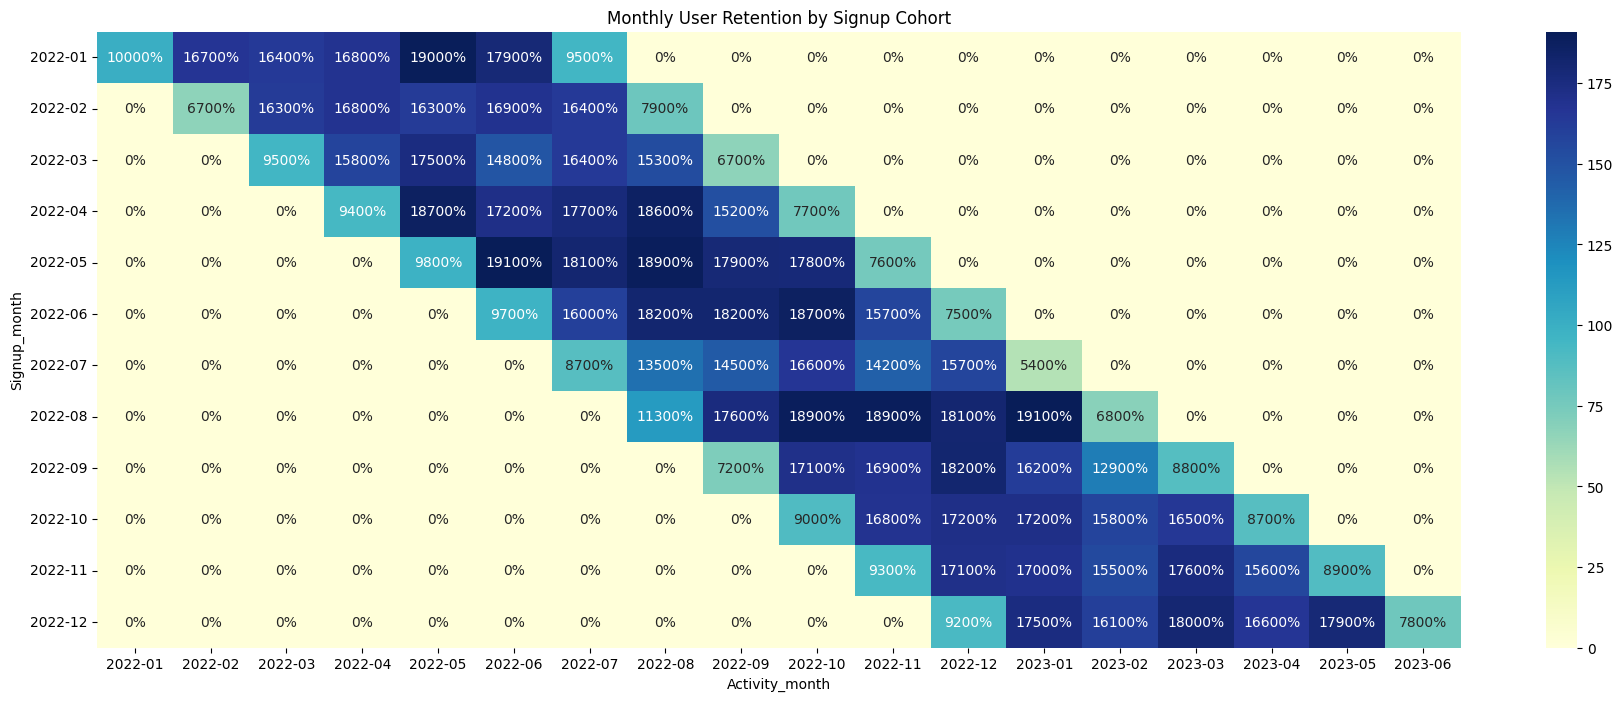

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(22, 8))
sns.heatmap(cohort, annot=True, cmap="YlGnBu", fmt=".0%")
plt.title("Monthly User Retention by Signup Cohort")
plt.show()

In [9]:
df.head()

,User_ID,Signup_Date,Activity_Date,Signup_year,Signup_month,Signup_date,Activity_year,Activity_month,Activity_date
0,1,2022-04-13,2022-08-28,2022,2022-04,13,2022,2022-08,28
1,1,2022-04-13,2022-05-21,2022,2022-04,13,2022,2022-05,21
2,1,2022-04-13,2022-05-10,2022,2022-04,13,2022,2022-05,10
3,1,2022-04-13,2022-05-31,2022,2022-04,13,2022,2022-05,31
4,2,2022-12-15,2023-04-18,2022,2022-12,15,2023,2023-04,18


In [10]:
cohort_counts = df.groupby('Signup_month')['User_ID'].nunique().reset_index()
cohort_counts.columns = ['Signup_Cohort', 'User_Count']

print(cohort_counts)

   Signup_Cohort  User_Count
0        2022-01         420
1        2022-02         392
2        2022-03         404
3        2022-04         433
4        2022-05         441
5        2022-06         440
6        2022-07         375
7        2022-08         441
8        2022-09         395
9        2022-10         418
10       2022-11         411
11       2022-12         430
